
# Predicting Human Personality(Beginner Level), Performed Little EDA along with replacing NaN values with class wise metrics

## **Importing Necessary Libraries** 

In [1]:
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/kaggle/input/extrovert-vs-introvert-behavior-data/personality_dataset.csv')

In [3]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [4]:
df.shape

(2900, 8)

In [5]:
df.isnull().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [6]:
df.Personality.value_counts()

Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64

## Listing & Separating Columns

In [7]:
cols=df.columns
num_cols=[x for x in df.columns if df[x].dtypes!='O']
cat_cols=[y for y in cols if y not in num_cols]

##   Handling Missing values

In [8]:
for col in num_cols:
    x=df[df.Personality=='Extrovert'][col].mean()
    df.loc[df.Personality == 'Extrovert', col] = df.loc[df.Personality == 'Extrovert', col].fillna(x)
    y=df[df.Personality=='Introvert'][col].mean()
    df.loc[df.Personality == 'Introvert', col] = df.loc[df.Personality == 'Introvert', col].fillna(y)

In [9]:
for col in cat_cols:
    x=df[df.Personality=='Extrovert'][col].mode()[0]
    df.loc[df.Personality == 'Extrovert', col] = df.loc[df.Personality == 'Extrovert', col].fillna(x)
    y=df[df.Personality=='Introvert'][col].mode()[0]
    df.loc[df.Personality == 'Introvert', col] = df.loc[df.Personality == 'Introvert', col].fillna(y)

In [10]:
df.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

## EDA

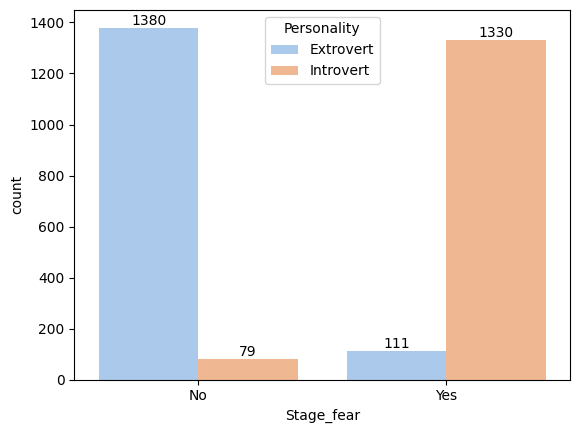

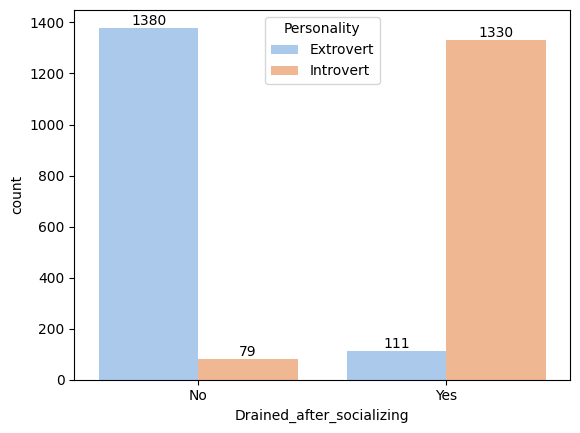

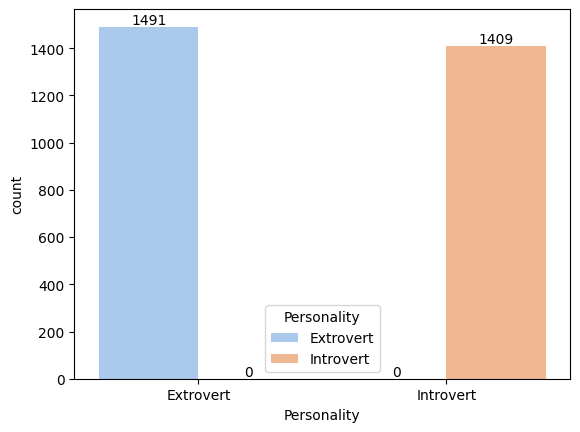

In [11]:
for col in cat_cols:
    ax=sns.countplot(x=col,data=df,hue='Personality',palette='pastel')
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()

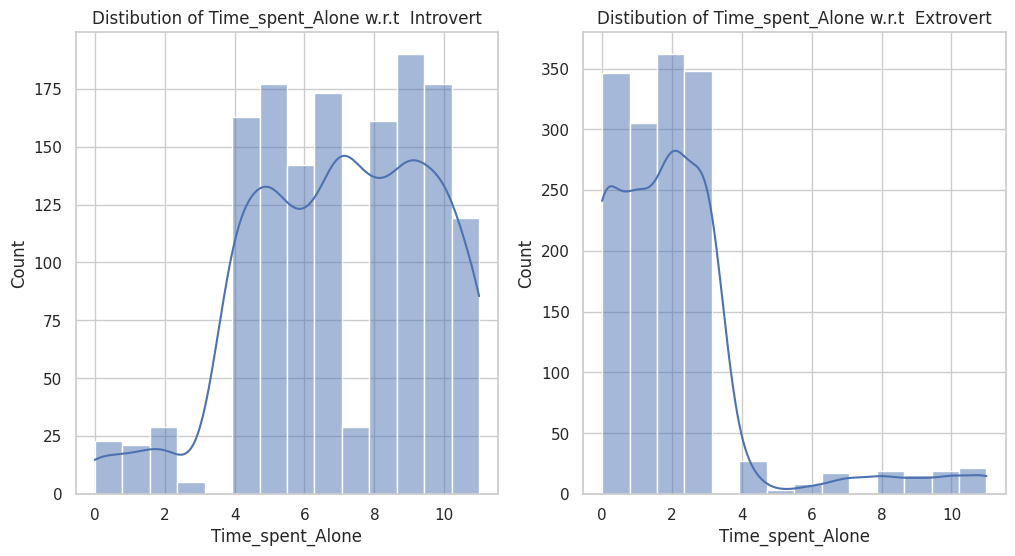

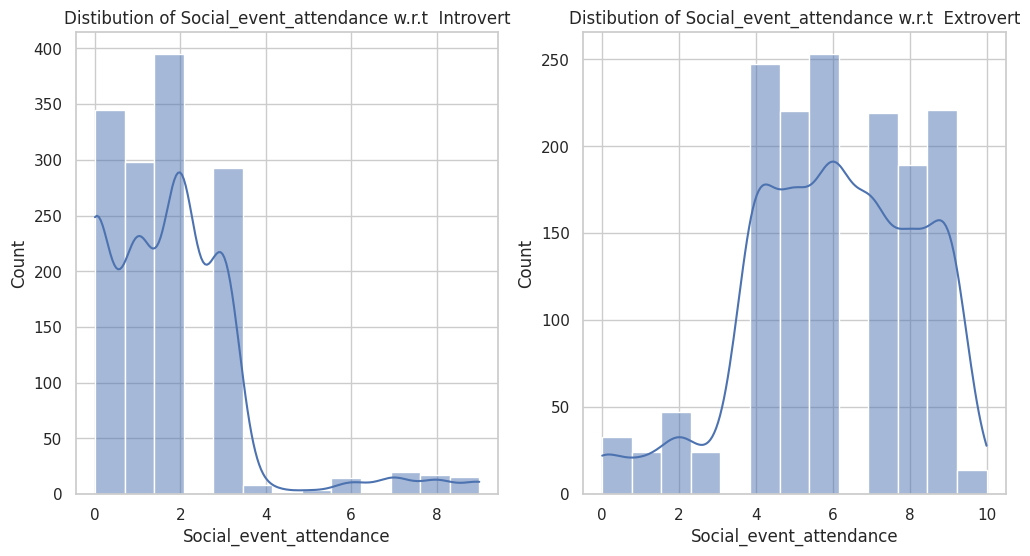

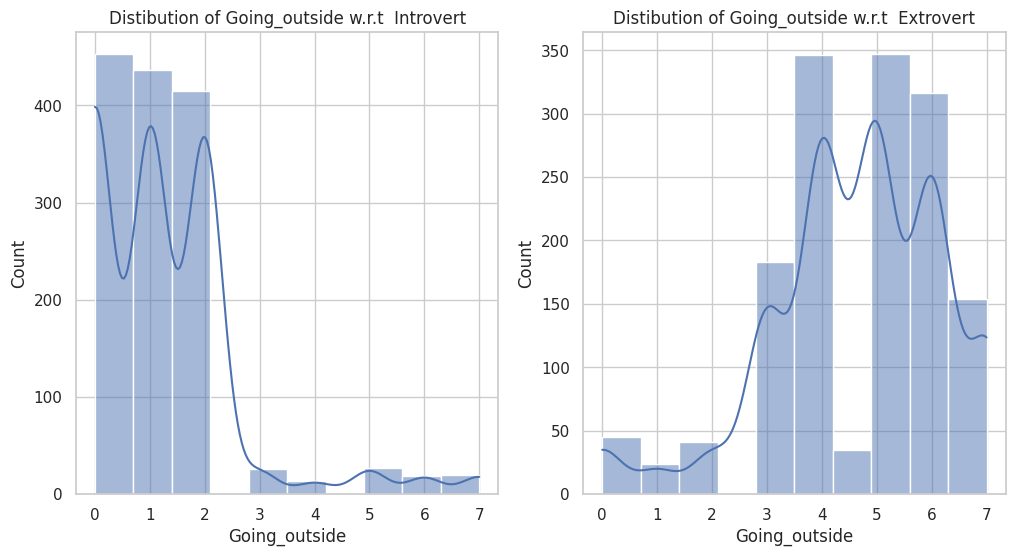

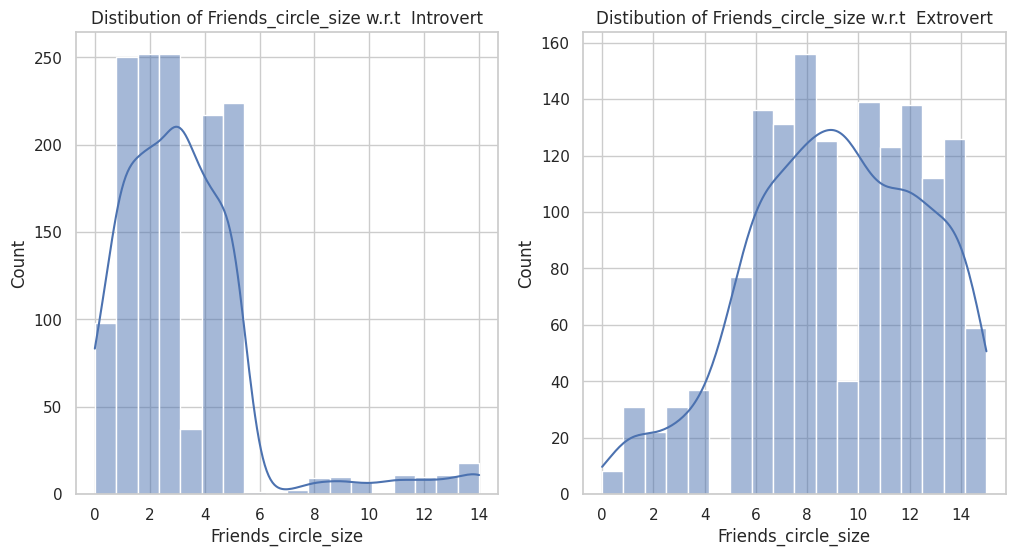

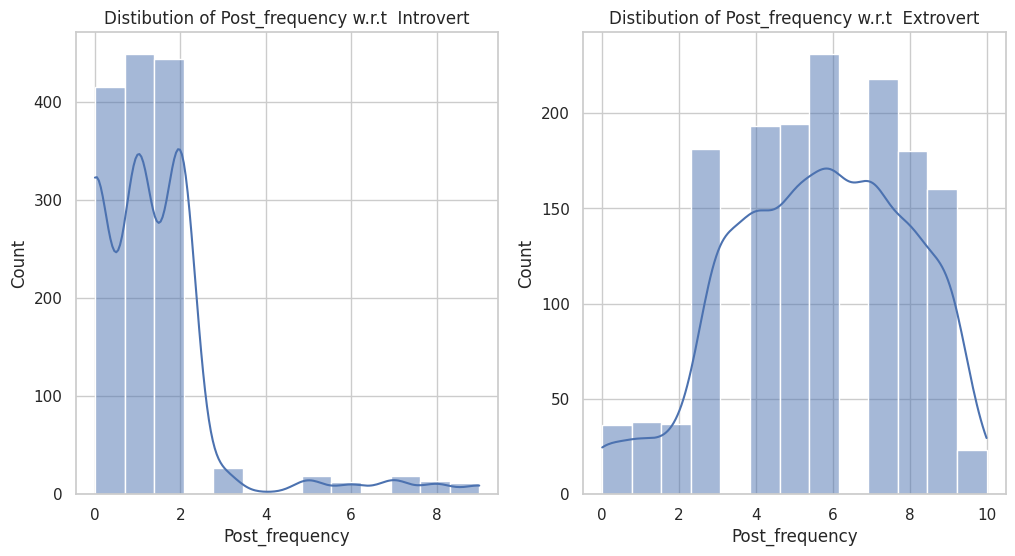

In [12]:
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
for col in num_cols:
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.histplot(x=col,kde=True,data=df[df.Personality=="Introvert"],bins=df[col].nunique())
    plt.title(f'Distibution of {col} w.r.t  Introvert')
    plt.subplot(1,2,2)
    sns.histplot(x=col,kde=True,data=df[df.Personality=="Extrovert"],bins=df[col].nunique())
    plt.title(f'Distibution of {col} w.r.t  Extrovert')
    plt.show()

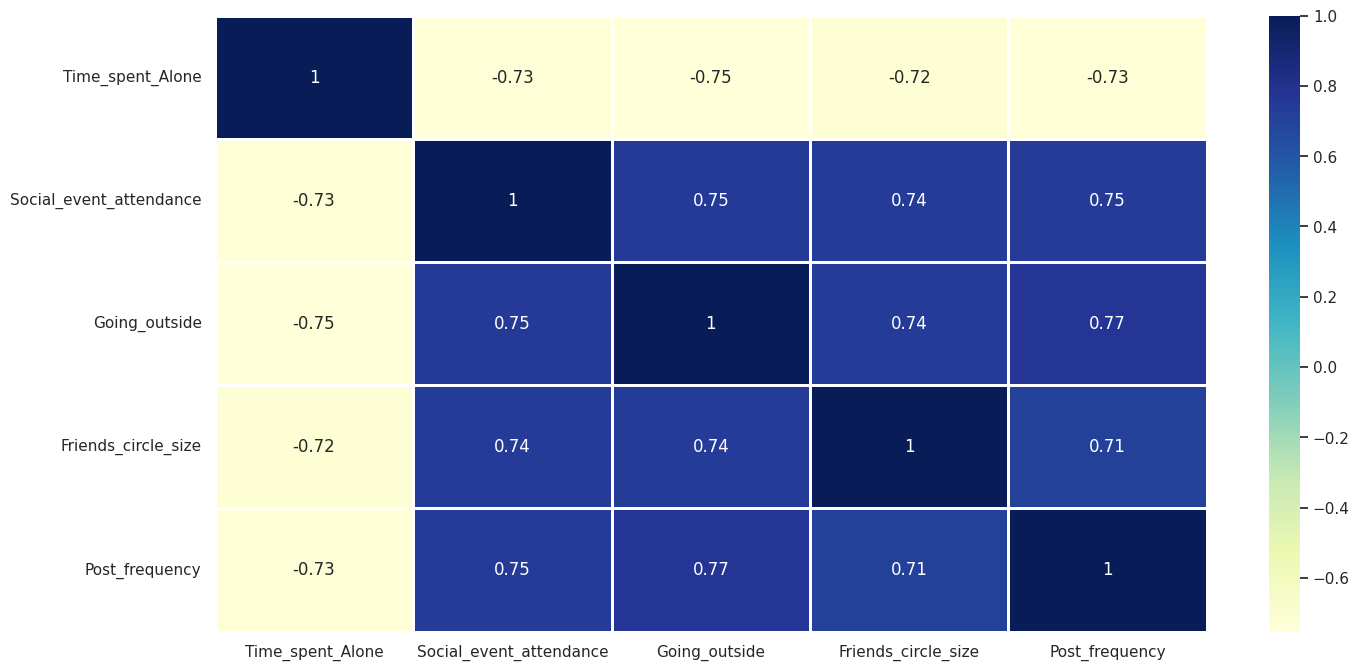

In [13]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(numeric_only=True),cmap='YlGnBu',annot=True,linewidths=0.75)
plt.show()

## Feature Encoding

In [14]:
stage_fear_map={'Yes':1,'No':0}
df['Stage_fear']=df['Stage_fear'].map(stage_fear_map)
soc_map={'Yes':1,'No':0}
df['Drained_after_socializing']=df['Drained_after_socializing'].map(soc_map)
personality_map={'Introvert':1,'Extrovert':0}
df['Personality']=df['Personality'].map(personality_map)

In [15]:
for col in cols:
    print(df[col].value_counts())
    print(f'\n{ "-" * 20 }\n')

Time_spent_Alone
0.000000     369
2.000000     357
3.000000     353
1.000000     326
9.000000     206
10.000000    196
4.000000     190
7.000000     190
5.000000     180
8.000000     180
6.000000     150
11.000000    140
2.067261      34
7.080435      29
Name: count, dtype: int64

--------------------

Stage_fear
0    1459
1    1441
Name: count, dtype: int64

--------------------

Social_event_attendance
2.000000     408
0.000000     378
1.000000     322
3.000000     317
4.000000     255
6.000000     239
7.000000     239
9.000000     236
5.000000     224
8.000000     206
1.778909      34
6.016405      28
10.000000     14
Name: count, dtype: int64

--------------------

Going_outside
0.000000    498
2.000000    456
1.000000    429
5.000000    374
4.000000    359
6.000000    335
3.000000    209
7.000000    174
4.634615     35
1.272859     31
Name: count, dtype: int64

--------------------

Drained_after_socializing
0    1459
1    1441
Name: count, dtype: int64

--------------------

Frie

## Since our NaN values of Numerical Columns were replaced with mean, there are float values in our dataset,let's remove them

In [16]:
for col in num_cols:
    df[col]=df[col].astype(int)

## Importing Libraries for Logistic Model 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

## Splitting Data

In [18]:
X=df.drop('Personality',axis=1)
y=df.Personality

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)


## Model Initialization & Training

In [20]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_train_pred=model.predict(X_train)
accuracy_score(y_train,y_train_pred)

0.9336206896551724

In [21]:
y_test_pred=model.predict(X_test)
accuracy_score(y_test,y_test_pred)

0.9379310344827586

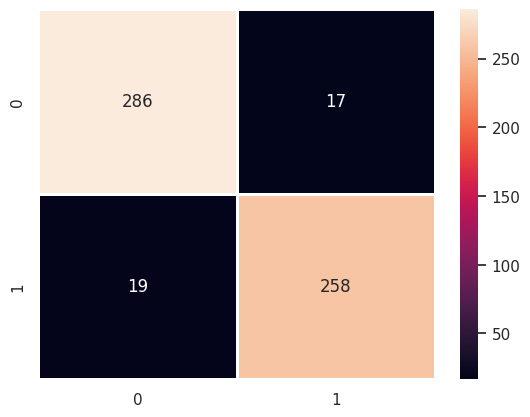

In [22]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,linewidth=0.75,fmt='d')
plt.show()

In [23]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       303
           1       0.94      0.93      0.93       277

    accuracy                           0.94       580
   macro avg       0.94      0.94      0.94       580
weighted avg       0.94      0.94      0.94       580

